In [136]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df=pd.read_excel("C:\\Users\\SonuR\\Downloads\\Test1.xlsx")

In [34]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [60]:
reviews=df['Rating text'].dropna().tolist()

In [62]:
pos_review=[]
neg_review=[]

In [64]:
for review in reviews:
    sentiment=sen.polarity_scores(review)
    if sentiment['compound']>=0.05:
        pos_review.append(review)
    elif sentiment['compound']<=-0.05:
        neg_review.append(review)

In [66]:
pos_review

['Excellent',
 'Excellent',
 'Very Good',
 'Excellent',
 'Excellent',
 'Very Good',
 'Very Good',
 'Very Good',
 'Excellent',
 'Excellent',
 'Excellent',
 'Very Good',
 'Excellent',
 'Very Good',
 'Very Good',
 'Good',
 'Very Good',
 'Excellent',
 'Excellent',
 'Very Good',
 'Excellent',
 'Excellent',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Very Good',
 'Good',
 'Very Good',
 'Very Good',
 'Good',
 'Very Good',
 'Excellent',
 'Good',
 'Very Good',
 'Excellent',
 'Excellent',
 'Excellent',
 'Very Good',
 'Excellent',
 'Excellent',
 'Excellent',
 'Excellent',
 'Excellent',
 'Very Good',
 'Very Good',
 'Excellent',
 'Very Good',
 'Very Good',
 'Very Good',
 'Excellent',
 'Excellent',
 'Very Good',
 'Excellent',
 'Very Good',
 'Very Good',
 'Excellent',
 'Excellent',
 'Good',
 'Good',
 'Very Good',
 'Good',
 'Very Good',
 'Very Good',
 'Very Good',
 'Very Good',
 'Excellent',
 'Very Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Go

In [68]:
neg_review

['Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 

In [88]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.downloader.download('vader_lexicon')
from sklearn.feature_extraction.text import CountVectorizer

sen=SentimentIntensityAnalyzer()


print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SonuR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\SonuR\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [106]:

def review_keywords(reviews):
    nltk.download('stopwords')
    
    stop_words =list(set(stopwords.words('english')))
    filtered_reviews = [' '.join([word for word in review.split() if word.lower() not in stop_words]) for review in reviews]
    
    vectorizer = CountVectorizer(stop_words=stop_words)
    word_count = vectorizer.fit_transform(filtered_reviews)
    word_count_sum = word_count.sum(axis=0)
    
    words_freq = [(word, word_count_sum[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    
    return words_freq

In [114]:

positive_keywords = review_keywords(pos_review)
positive_keywords
negative_keywords = review_keywords(neg_review)
negative_keywords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SonuR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SonuR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('poor', 186)]

In [112]:
print("Most common positive keywords:")
for word, freq in positive_keywords[:10]:
    print(f"{word}: {freq}")

Most common positive keywords:
good: 3179
excellent: 301


In [116]:
print("\nMost common negative keywords:")
for word, freq in negative_keywords[:10]:
    print(f"{word}: {freq}")


Most common negative keywords:
poor: 186


In [120]:
df=df.dropna(subset=['Rating text','Aggregate rating'])

In [122]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [128]:
review_length=df['Rating text'].apply(len)
review_length

0       9
1       9
2       9
3       9
4       9
       ..
9546    9
9547    9
9548    4
9549    9
9550    9
Name: Rating text, Length: 9551, dtype: int64

In [132]:
average_length=review_length.mean()
average_length

7.020730813527379

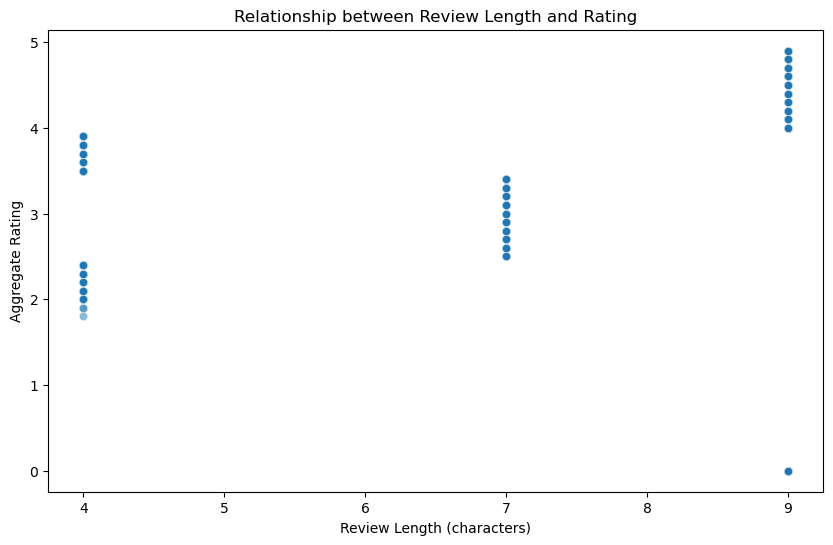

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

df['Review Length'] = df['Rating text'].apply(len)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Review Length', y='Aggregate rating', alpha=0.5)
plt.title('Relationship between Review Length and Rating')
plt.xlabel('Review Length (characters)')
plt.ylabel('Aggregate Rating')
plt.show()

In [146]:
correlation = df['Review Length'].corr(df['Aggregate rating'])

In [148]:
correlation

-0.47888483813493316